# This notebook was used to collapse the whitespace in the dataset that was a result of the two EMIT granules being on slightly offset grid spacings.

In [1]:
import os
import pickle

import numpy as np
import matplotlib.pyplot as plt

In [2]:
project_path = 'C:\\Users\\danny\\Documents_Local\\Caltech_2023-2024\\CS101'

def join_path(relative_path: str) -> str:
    return os.path.join(project_path, relative_path)

def pickle_load(relative_path: str):  # -> pickled_file_contents
    return pickle.load(open(join_path(relative_path), 'rb'))

def pickle_save(obj: object, relative_path: str) -> None:
    pickle.dump(obj, open(join_path(relative_path), 'wb'))

In [25]:
ref = pickle_load('Data\\Decomposed_Data_3\\reflectance.pkl')
elev = pickle_load('Data\\Decomposed_Data_3\\elevation.pkl')
lat = pickle_load('Data\\Decomposed_Data_3\\latitude.pkl')
lon = pickle_load('Data\\Decomposed_Data_3\\longitude.pkl')
gc = pickle_load('Data\\Decomposed_Data_3\\good_coords.pkl')
temp = pickle_load('Data\\Decomposed_Data_3\\temp_day.pkl')

In [234]:
ilist = []
for i in range(1, len(lat)):
    if abs(lat[i] - lat[i-1]) < 1e-6:
        ilist.append(i)
        
jlist = []
for j in range(1, len(lon)):
    if abs(lon[j] - lon[j-1]) < 1e-6:
        jlist.append(j)
        

lat_coll = np.concatenate(
    [
        lat[:ilist[0] - 1],
        lat[ilist[0] - 1: ilist[-1] + 1: 2],
        lat[ilist[-1] + 1:],
    ]
)

lon_coll = np.concatenate(
    [
        lon[:jlist[0] - 1],
        lon[jlist[0] - 1: jlist[-1] + 1: 2],
        lon[jlist[-1] + 1:],
    ]
)


lat_coll_ind = []
for lat_val in lat:
    if lat_val in lat_coll:
        lat_coll_ind.append(1)
    else:
        lat_coll_ind.append(0)
        
lon_coll_ind = []
for lon_val in lon:
    if lon_val in lon_coll:
        lon_coll_ind.append(1)
    else:
        lon_coll_ind.append(0)

In [235]:
ref_collapsed = np.empty((len(lat_coll), len(lon_coll), ref.shape[2])) + np.nan
elev_collapsed = np.empty((len(lat_coll), len(lon_coll))) + np.nan
gc_collapsed = np.empty((len(lat_coll), len(lon_coll))) + np.nan
temp_collapsed = np.empty((len(lat_coll), len(lon_coll))) + np.nan

In [236]:
lat_cutoff = np.argmin(lat_coll_ind)
lon_cutoff = np.argmin(lon_coll_ind)
lat_coll_filled = 0
for iind, i in enumerate(lat_coll_ind):
    if i:
        lon_coll_filled = 0
        for jind, j in enumerate(lon_coll_ind):
            if j:
                if iind < lat_cutoff:
                    if jind < lon_cutoff:
                        ref_collapsed[lat_coll_filled, lon_coll_filled] = ref[
                            iind, jind, :
                        ]
                        elev_collapsed[lat_coll_filled, lon_coll_filled] = elev[
                            iind, jind
                        ]
                        gc_collapsed[lat_coll_filled, lon_coll_filled] = gc[
                            iind, jind
                        ]
                        temp_collapsed[lat_coll_filled, lon_coll_filled] = temp[
                            iind, jind
                        ]
                    else:
                        ref_collapsed[lat_coll_filled, lon_coll_filled] = ref[
                            iind, jind - 1, :
                        ]
                        elev_collapsed[lat_coll_filled, lon_coll_filled] = elev[
                            iind, jind - 1
                        ]
                        gc_collapsed[lat_coll_filled, lon_coll_filled] = gc[
                            iind, jind - 1
                        ]
                        temp_collapsed[lat_coll_filled, lon_coll_filled] = temp[
                            iind, jind - 1
                        ]
                else:
                    if jind < lon_cutoff:
                        ref_collapsed[lat_coll_filled, lon_coll_filled] = ref[
                            iind - 1, jind, :
                        ]
                        elev_collapsed[lat_coll_filled, lon_coll_filled] = elev[
                            iind - 1, jind
                        ]
                        gc_collapsed[lat_coll_filled, lon_coll_filled] = gc[
                            iind - 1, jind
                        ]
                        temp_collapsed[lat_coll_filled, lon_coll_filled] = temp[
                            iind - 1, jind
                        ]
                    else:
                        if np.isnan(elev[iind, jind]):
                            ref_collapsed[lat_coll_filled, lon_coll_filled] = ref[
                                iind - 1, jind - 1, :
                            ]
                            elev_collapsed[lat_coll_filled, lon_coll_filled] = elev[
                                iind - 1, jind - 1
                            ]
                            gc_collapsed[lat_coll_filled, lon_coll_filled] = gc[
                                iind - 1, jind - 1
                            ]
                            temp_collapsed[lat_coll_filled, lon_coll_filled] = (
                                temp[iind - 1, jind - 1]
                            )
                        else:
                            ref_collapsed[lat_coll_filled, lon_coll_filled] = ref[
                                iind, jind, :
                            ]
                            elev_collapsed[lat_coll_filled, lon_coll_filled] = elev[
                                iind, jind
                            ]
                            gc_collapsed[lat_coll_filled, lon_coll_filled] = gc[
                                iind, jind
                            ]
                            temp_collapsed[lat_coll_filled, lon_coll_filled] = (
                                temp[iind, jind]
                            )
                lon_coll_filled += 1
        lat_coll_filled += 1

(<matplotlib.image.AxesImage at 0x1f88ff38cd0>,
 <matplotlib.image.AxesImage at 0x1f89ee5ec50>)

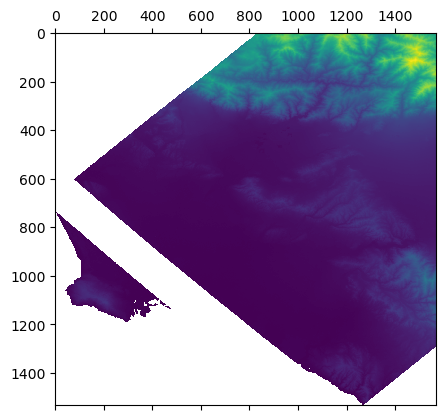

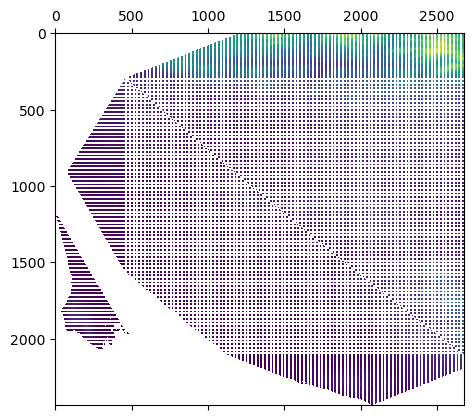

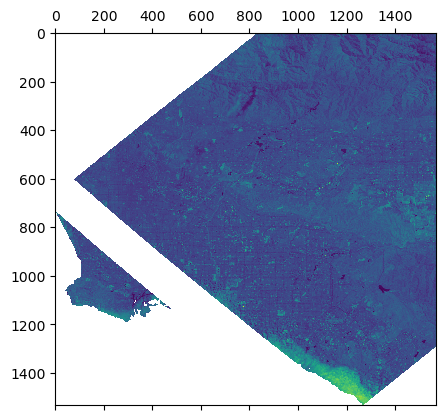

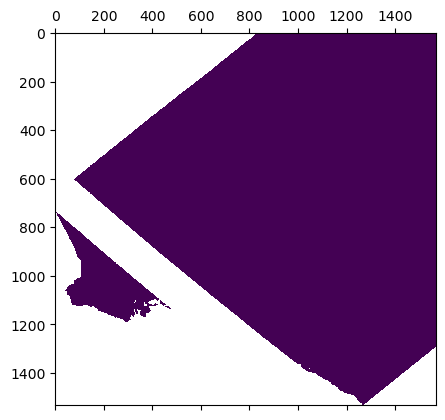

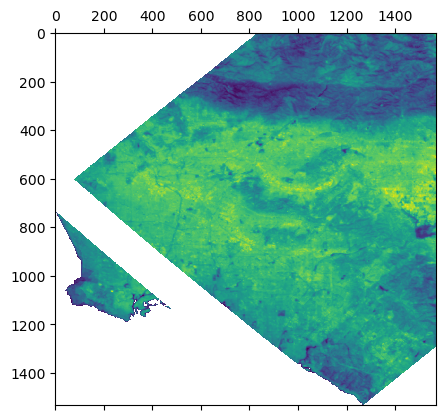

In [237]:
plt.matshow(elev_collapsed[::-1]), plt.matshow(elev[::-1]), plt.matshow(ref_collapsed[::-1, :, 100]), plt.matshow(gc_collapsed[::-1]), plt.matshow(temp_collapsed[::-1])

In [ ]:
pickle_save(ref_collapsed, 'Data\\Collapsed_Data\\reflectance.pkl')
pickle_save(elev_collapsed, 'Data\\Collapsed_Data\\elevation.pkl')
pickle_save(gc_collapsed, 'Data\\Collapsed_Data\\good_coords.pkl')
pickle_save(temp_collapsed, 'Data\\Collapsed_Data\\temp.pkl')
pickle_save(lat_coll, 'Data\\Collapsed_Data\\latitude.pkl')
pickle_save(lon_coll, 'Data\\Collapsed_Data\\longitude.pkl')